# The Sharpe Ratio: Risk-Adjusted Returns

**Time:** 15 minutes

**Prerequisites:** 01-04_*.ipynb

---

A 50% return sounds amazing, but what if you had to endure 80% volatility to get it? The **Sharpe Ratio** answers the critical question: "Was the return worth the risk?"

## The Problem: Return Alone Isn't Enough

Consider two investments:

| Investment | Return | Volatility |
|------------|--------|------------|
| A | 15% | 10% |
| B | 20% | 40% |

Investment B has higher return, but Investment A might be better. Why?

**The Sharpe Ratio** tells us how much return we get **per unit of risk**.


## The Sharpe Ratio Formula

$$\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}$$

Where:
- $R_p$ = Portfolio (or asset) return
- $R_f$ = Risk-free rate (what you'd earn with zero risk)
- $\sigma_p$ = Standard deviation of returns (volatility)

**Breaking it down:**

1. **$R_p - R_f$**: This is the **excess return** - how much more you earned than the risk-free alternative
2. **$\sigma_p$**: This is the **risk you took** to earn that return
3. **Division**: Gives you **return per unit of risk**

**Rule of Thumb**

- **< 0** — Losing to risk-free rate
- **0 - 0.5** — Poor risk-adjusted returns
- **0.5 - 1.0** — Acceptable
- **1.0 - 2.0** — Good
- **> 2.0** — Excellent (or suspicious)

In [1]:
# Install required packages
!pip install -q yfinance pandas numpy matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

def calculate_sharpe_ratio(returns, risk_free_rate=0.05):
    """Calculate the Sharpe Ratio from returns.

    Args:
        returns: Array/Series of returns (as decimals, e.g., 0.01 for 1%)
        risk_free_rate: Annual risk-free rate (default 5%)

    Returns:
        Annualized Sharpe Ratio
    """
    # Convert to numpy array if needed
    returns = np.array(returns)

    # Calculate annualized return and volatility
    # Assuming daily returns
    annual_return = np.mean(returns) * 252  # 252 trading days
    annual_volatility = np.std(returns, ddof=1) * np.sqrt(252)

    # Calculate excess return
    excess_return = annual_return - risk_free_rate

    # Sharpe Ratio
    sharpe = excess_return / annual_volatility

    return {
        'annual_return': annual_return * 100,  # As percentage
        'annual_volatility': annual_volatility * 100,
        'excess_return': excess_return * 100,
        'sharpe_ratio': sharpe
    }

# Simple example
print("Understanding the Sharpe Ratio")
print("=" * 50)

# Example: Imagine daily returns averaging 0.08% with 1.5% daily volatility
example_daily_return = 0.0008  # 0.08%
example_daily_vol = 0.015      # 1.5%

annual_ret = example_daily_return * 252  # ~20%
annual_vol = example_daily_vol * np.sqrt(252)  # ~24%
risk_free = 0.05  # 5%

sharpe = (annual_ret - risk_free) / annual_vol

print(f"\nExample calculation:")
print(f"  Annual Return:     {annual_ret*100:.1f}%")
print(f"  Risk-Free Rate:    {risk_free*100:.1f}%")
print(f"  Excess Return:     {(annual_ret-risk_free)*100:.1f}%")
print(f"  Annual Volatility: {annual_vol*100:.1f}%")
print(f"\n  Sharpe Ratio = {(annual_ret-risk_free)*100:.1f}% / {annual_vol*100:.1f}% = {sharpe:.2f}")

Understanding the Sharpe Ratio

Example calculation:
  Annual Return:     20.2%
  Risk-Free Rate:    5.0%
  Excess Return:     15.2%
  Annual Volatility: 23.8%

  Sharpe Ratio = 15.2% / 23.8% = 0.64


## What is the Risk-Free Rate?

The **risk-free rate** is the return you could earn with essentially zero risk - typically:

- **US Treasury Bills** (3-month T-bills)
- **Bank savings accounts** (FDIC insured)

**Why subtract it?**

If you can earn 5% risk-free, you only deserve credit for returns **above** that. Taking risk to earn 4% when you could earn 5% risk-free would be foolish!



In [3]:
def get_risk_free_rate():
    """Get current risk-free rate from 13-week Treasury Bill."""
    try:
        # ^IRX is the 13-week Treasury Bill rate
        tbill = yf.Ticker("^IRX")
        rate = tbill.info.get('regularMarketPrice', 5.0) / 100
        return rate
    except:
        return 0.05  # Default to 5%

current_rf = get_risk_free_rate()
print(f"Current risk-free rate (approx): {current_rf*100:.2f}%")

Current risk-free rate (approx): 3.58%


## Calculating Sharpe for Real Stocks

Let's calculate the Sharpe Ratio for actual stocks.

In [4]:
def stock_sharpe_analysis(ticker, period="1y", risk_free_rate=0.05):
    """Calculate Sharpe Ratio for a stock.

    Args:
        ticker: Stock symbol
        period: Analysis period
        risk_free_rate: Annual risk-free rate
    """
    stock = yf.Ticker(ticker)
    hist = stock.history(period=period)

    if len(hist) < 20:
        return None

    # Calculate daily returns
    daily_returns = hist['Close'].pct_change().dropna()

    # Calculate metrics
    trading_days = len(daily_returns)

    # Annualized return
    total_return = (hist['Close'].iloc[-1] / hist['Close'].iloc[0]) - 1
    annual_return = (1 + total_return) ** (252 / trading_days) - 1

    # Annualized volatility
    daily_vol = daily_returns.std()
    annual_vol = daily_vol * np.sqrt(252)

    # Sharpe Ratio
    excess_return = annual_return - risk_free_rate
    sharpe = excess_return / annual_vol

    return {
        'ticker': ticker,
        'annual_return': annual_return * 100,
        'annual_volatility': annual_vol * 100,
        'excess_return': excess_return * 100,
        'sharpe_ratio': sharpe,
        'risk_free_rate': risk_free_rate * 100
    }

# Analyze multiple stocks
tickers = ["AAPL", "NVDA", "MSFT", "GOOGL", "TSLA", "SPY"]
risk_free = 0.05  # 5%

print("Sharpe Ratio Analysis (1-Year)")
print(f"Risk-Free Rate: {risk_free*100:.1f}%")
print("=" * 75)
print(f"{'Ticker':<8} {'Return':>12} {'Volatility':>12} {'Excess':>12} {'Sharpe':>10} {'Rating':>12}")
print("-" * 75)

results = []
for ticker in tickers:
    stats = stock_sharpe_analysis(ticker, "1y", risk_free)
    if stats:
        results.append(stats)

        # Rating
        if stats['sharpe_ratio'] >= 2:
            rating = "Excellent"
        elif stats['sharpe_ratio'] >= 1:
            rating = "Good"
        elif stats['sharpe_ratio'] >= 0:
            rating = "Poor"
        else:
            rating = "Negative"

        print(f"{stats['ticker']:<8} {stats['annual_return']:>+11.1f}% {stats['annual_volatility']:>11.1f}% {stats['excess_return']:>+11.1f}% {stats['sharpe_ratio']:>10.2f} {rating:>12}")

# Sort by Sharpe and show best/worst
print("\n" + "-" * 75)
sorted_results = sorted(results, key=lambda x: x['sharpe_ratio'], reverse=True)
print(f"Best risk-adjusted:  {sorted_results[0]['ticker']} (Sharpe: {sorted_results[0]['sharpe_ratio']:.2f})")
print(f"Worst risk-adjusted: {sorted_results[-1]['ticker']} (Sharpe: {sorted_results[-1]['sharpe_ratio']:.2f})")

Sharpe Ratio Analysis (1-Year)
Risk-Free Rate: 5.0%
Ticker         Return   Volatility       Excess     Sharpe       Rating
---------------------------------------------------------------------------
AAPL           +19.1%        31.9%       +14.1%       0.44         Poor
NVDA           +59.7%        44.2%       +54.7%       1.24         Good
MSFT            +3.8%        25.5%        -1.2%      -0.05     Negative
GOOGL          +72.2%        31.8%       +67.2%       2.11    Excellent
TSLA           +10.0%        62.3%        +5.0%       0.08         Poor
SPY            +17.9%        19.3%       +12.9%       0.67         Poor

---------------------------------------------------------------------------
Best risk-adjusted:  GOOGL (Sharpe: 2.11)
Worst risk-adjusted: MSFT (Sharpe: -0.05)


## Visualizing Risk vs. Return

A scatter plot helps us see the risk-return tradeoff.

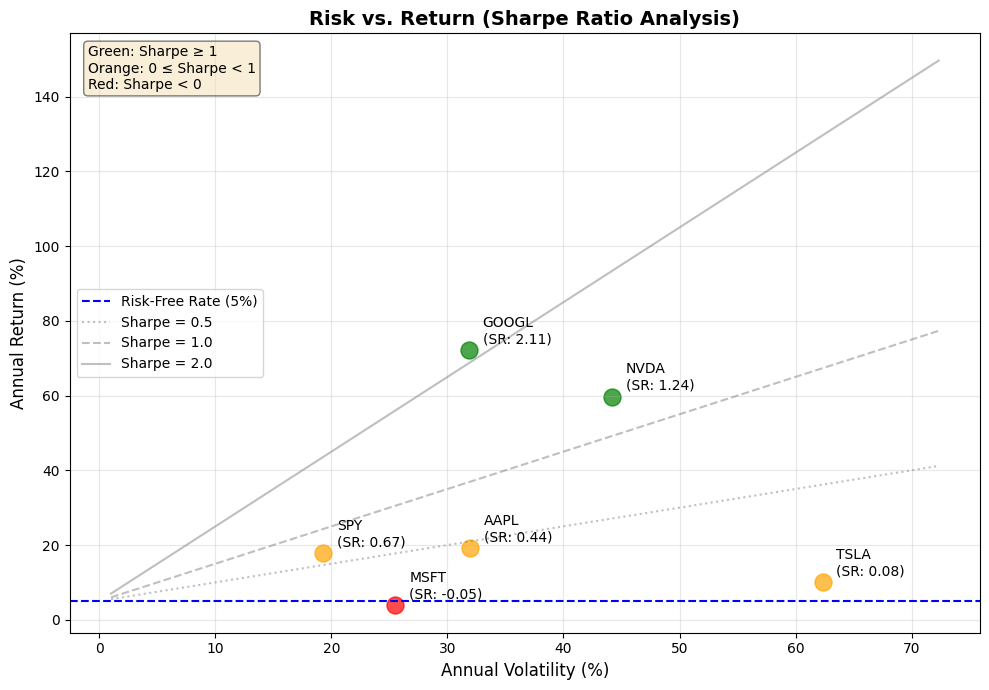

In [6]:
import matplotlib.pyplot as plt

# Create risk-return scatter plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot each stock
for r in results:
    color = 'green' if r['sharpe_ratio'] >= 1 else 'orange' if r['sharpe_ratio'] >= 0 else 'red'
    ax.scatter(r['annual_volatility'], r['annual_return'], s=150, c=color, alpha=0.7)
    ax.annotate(f"{r['ticker']}\n(SR: {r['sharpe_ratio']:.2f})",
                (r['annual_volatility'], r['annual_return']),
                textcoords="offset points", xytext=(10, 5), fontsize=10)

# Plot risk-free rate
ax.axhline(y=risk_free*100, color='blue', linestyle='--', label=f'Risk-Free Rate ({risk_free*100:.0f}%)')

vol_range = np.linspace(1, max(r['annual_volatility'] for r in results) + 10, 100)
for sharpe_val, style in [(0.5, ':'), (1.0, '--'), (2.0, '-')]:
    implied_return = risk_free * 100 + sharpe_val * vol_range
    ax.plot(vol_range, implied_return, 'gray', linestyle=style, alpha=0.5,
            label=f'Sharpe = {sharpe_val}')

# Labels and title
ax.set_xlabel('Annual Volatility (%)', fontsize=12)
ax.set_ylabel('Annual Return (%)', fontsize=12)
ax.set_title('Risk vs. Return (Sharpe Ratio Analysis)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Add annotation explaining colors
ax.text(0.02, 0.98, 'Green: Sharpe ≥ 1\nOrange: 0 ≤ Sharpe < 1\nRed: Sharpe < 0',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## Why Sharpe Ratio Matters: A Practical Example

Let's compare two investments to see why Sharpe is more useful than return alone.

In [7]:
def compare_investments(ticker1, ticker2, period="1y", risk_free=0.05):
    """Compare two investments using Sharpe Ratio."""
    inv1 = stock_sharpe_analysis(ticker1, period, risk_free)
    inv2 = stock_sharpe_analysis(ticker2, period, risk_free)

    print(f"Investment Comparison: {ticker1} vs {ticker2}")
    print("=" * 55)
    print(f"{'Metric':<25} {ticker1:>12} {ticker2:>12}")
    print("-" * 55)
    print(f"{'Annual Return':<25} {inv1['annual_return']:>+11.1f}% {inv2['annual_return']:>+11.1f}%")
    print(f"{'Annual Volatility':<25} {inv1['annual_volatility']:>11.1f}% {inv2['annual_volatility']:>11.1f}%")
    print(f"{'Sharpe Ratio':<25} {inv1['sharpe_ratio']:>12.2f} {inv2['sharpe_ratio']:>12.2f}")
    print("-" * 55)

    # Determine winner
    if inv1['sharpe_ratio'] > inv2['sharpe_ratio']:
        return_winner = ticker1 if inv1['annual_return'] > inv2['annual_return'] else ticker2
        sharpe_winner = ticker1
    else:
        return_winner = ticker1 if inv1['annual_return'] > inv2['annual_return'] else ticker2
        sharpe_winner = ticker2

    print(f"\nHigher Return:       {return_winner}")
    print(f"Better Risk-Adjusted:{sharpe_winner}")

    if return_winner != sharpe_winner:
        print(f"\n⚠️ {sharpe_winner} had lower returns but better risk-adjusted performance!")
        print(f"   This means {sharpe_winner} got more return per unit of risk.")

# Compare high-flying NVDA vs steady MSFT
compare_investments("NVDA", "MSFT", "1y")

Investment Comparison: NVDA vs MSFT
Metric                            NVDA         MSFT
-------------------------------------------------------
Annual Return                   +59.7%        +3.8%
Annual Volatility                44.2%        25.5%
Sharpe Ratio                      1.24        -0.05
-------------------------------------------------------

Higher Return:       NVDA
Better Risk-Adjusted:NVDA


## Portfolio Sharpe Ratio

We can also calculate the Sharpe Ratio for an entire portfolio.

In [10]:
def portfolio_sharpe(holdings, period="1y", risk_free=0.05):
    """Calculate portfolio Sharpe Ratio with both arithmetic and geometric returns.

    Args:
        holdings: Dict of {ticker: weight} where weights sum to 1
        period: Analysis period
        risk_free: Risk-free rate

    Returns:
        Dict with portfolio metrics using both annualization methods
    """
    # Validate weights sum to 1
    total_weight = sum(holdings.values())
    if not np.isclose(total_weight, 1.0):
        raise ValueError(f"Weights must sum to 1.0, got {total_weight:.2f}")

    # Get returns for each stock
    returns_data = {}

    for ticker in holdings.keys():
        stock = yf.Ticker(ticker)
        hist = stock.history(period=period)
        returns_data[ticker] = hist['Close'].pct_change().dropna()

    # Align all returns to same dates
    df = pd.DataFrame(returns_data).dropna()

    # Calculate portfolio returns (weighted sum)
    portfolio_returns = sum(df[ticker] * weight for ticker, weight in holdings.items())

    trading_days = len(portfolio_returns)

    # Method 1: Arithmetic annualization (standard for Sharpe)
    arithmetic_return = portfolio_returns.mean() * 252

    # Method 2: Geometric annualization (actual compounded performance)
    total_return = (1 + portfolio_returns).prod() - 1
    geometric_return = (1 + total_return) ** (252 / trading_days) - 1

    # Volatility (same for both methods)
    annual_vol = portfolio_returns.std() * np.sqrt(252)

    # Sharpe Ratios
    sharpe_arithmetic = (arithmetic_return - risk_free) / annual_vol
    sharpe_geometric = (geometric_return - risk_free) / annual_vol

    return {
        'arithmetic_return': arithmetic_return * 100,
        'geometric_return': geometric_return * 100,
        'annual_volatility': annual_vol * 100,
        'sharpe_arithmetic': sharpe_arithmetic,
        'sharpe_geometric': sharpe_geometric,
        'trading_days': trading_days,
        'total_return': total_return * 100
    }


# Define a portfolio
my_portfolio = {
    'AAPL': 0.30,
    'NVDA': 0.20,
    'MSFT': 0.25,
    'GOOGL': 0.15,
    'AMZN': 0.10
}

print("Portfolio Sharpe Ratio Analysis")
print("=" * 60)
print("\nPortfolio Weights:")
for ticker, weight in my_portfolio.items():
    print(f"  {ticker}: {weight*100:.0f}%")

# Calculate portfolio Sharpe
port_stats = portfolio_sharpe(my_portfolio, "1y", 0.05)

print("\n" + "-" * 60)
print("RETURNS COMPARISON")
print("-" * 60)
print(f"  Total Return (actual):     {port_stats['total_return']:+.1f}%")
print(f"  Trading Days:              {port_stats['trading_days']}")
print(f"\n  Arithmetic Annual Return:  {port_stats['arithmetic_return']:+.1f}%")
print(f"  Geometric Annual Return:   {port_stats['geometric_return']:+.1f}%")
print(f"  Difference:                {port_stats['arithmetic_return'] - port_stats['geometric_return']:+.1f}%")

print("\n" + "-" * 60)
print("RISK METRICS")
print("-" * 60)
print(f"  Annual Volatility:         {port_stats['annual_volatility']:.1f}%")
print(f"\n  Sharpe (Arithmetic):       {port_stats['sharpe_arithmetic']:.2f}")
print(f"  Sharpe (Geometric):        {port_stats['sharpe_geometric']:.2f}")

print("\n" + "-" * 60)
print("INTERPRETATION")
print("-" * 60)
print("  • Arithmetic: Assumes returns don't compound (standard for Sharpe)")
print("  • Geometric:  Actual compounded growth rate")
print("=" * 60)

# Test weight validation
print("\n\nTesting weight validation...")
try:
    bad_portfolio = {'AAPL': 0.50, 'MSFT': 0.60}  # Sums to 1.10
    portfolio_sharpe(bad_portfolio)
except ValueError as e:
    print(f"  ✓ Caught error: {e}")

Portfolio Sharpe Ratio Analysis

Portfolio Weights:
  AAPL: 30%
  NVDA: 20%
  MSFT: 25%
  GOOGL: 15%
  AMZN: 10%

------------------------------------------------------------
RETURNS COMPARISON
------------------------------------------------------------
  Total Return (actual):     +29.7%
  Trading Days:              250

  Arithmetic Annual Return:  +29.5%
  Geometric Annual Return:   +30.0%
  Difference:                -0.5%

------------------------------------------------------------
RISK METRICS
------------------------------------------------------------
  Annual Volatility:         25.9%

  Sharpe (Arithmetic):       0.95
  Sharpe (Geometric):        0.96

------------------------------------------------------------
INTERPRETATION
------------------------------------------------------------
  • Arithmetic: Assumes returns don't compound (standard for Sharpe)
  • Geometric:  Actual compounded growth rate


Testing weight validation...
  ✓ Caught error: Weights must sum to 1.0, g

## Key Takeaways

### The Sharpe Ratio Formula:

$$\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}$$

Where:
- $R_p$ = Annual return of portfolio/asset
- $R_f$ = Risk-free rate (Treasury bills)
- $\sigma_p$ = Annual volatility (standard deviation)

### Key Concepts:

1. **Risk-Adjusted Returns:** Sharpe tells you return *per unit of risk*
2. **Risk-Free Rate:** The baseline return you could get with no risk
3. **Excess Return:** The return above the risk-free rate

### Why This Matters for AI Agents:

AI agents use Sharpe to:
- Compare investment opportunities fairly
- Optimize portfolios (maximize Sharpe = efficient frontier)
- Screen stocks by risk-adjusted performance
- Evaluate strategy performance

**Next Notebook:** We'll learn about **Maximum Drawdown** - the worst loss from peak to trough.